In [1]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx
import mapclassify

import folium
yucatan_ageb_urbana_marcogeo2020 = gpd.read_file('xc/31a.shp')
yucatan_ageb_rural_marcogeo2020 = gpd.read_file('xc/31ar.shp')
yucatan_ageb_marcogeo2020 = pd.concat([yucatan_ageb_urbana_marcogeo2020, yucatan_ageb_rural_marcogeo2020])
yucatan_ageb_marcogeo2020.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,3100100010130,31,001,0001,0130,"POLYGON ((3776847.045 1015576.473, 3776850.565..."
1,3100100010145,31,001,0001,0145,"POLYGON ((3776745.860 1015499.562, 3776745.439..."
2,3100100010164,31,001,0001,0164,"POLYGON ((3776136.004 1014614.653, 3776022.228..."
3,3100100010126,31,001,0001,0126,"POLYGON ((3776247.740 1014594.755, 3776229.182..."
4,3100100010107,31,001,0001,0107,"POLYGON ((3776613.825 1015270.341, 3776615.972..."


In [2]:
yucatan_ageb_marcogeo2020 = yucatan_ageb_marcogeo2020.to_crs(epsg=4485)

In [3]:
yucatan_ageb_marcogeo2020.crs

<Projected CRS: EPSG:4485>
Name: Mexico ITRF92 / UTM zone 12N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Mexico between 114°W and 108°W, onshore and offshore.
- bounds: (-114.0, 15.09, -108.0, 32.27)
Coordinate Operation:
- name: UTM zone 12N
- method: Transverse Mercator
Datum: Mexico ITRF92
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
yucatan_ageb_marcogeo2020.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,3100100010130,31,001,0001,0130,"POLYGON ((2760229.363 2437069.166, 2760235.194..."
1,3100100010145,31,001,0001,0145,"POLYGON ((2760125.637 2436981.633, 2760125.466..."
2,3100100010164,31,001,0001,0164,"POLYGON ((2759523.393 2436004.725, 2759401.389..."
3,3100100010126,31,001,0001,0126,"POLYGON ((2759643.636 2435989.581, 2759623.462..."
4,3100100010107,31,001,0001,0107,"POLYGON ((2759997.300 2436729.986, 2759993.895..."


In [5]:
"""#Replace with a 0 the data values that do not have a record
yucatan_ageb_marcogeo2020 = yucatan_ageb_marcogeo2020.replace('*', '0')
yucatan_ageb_marcogeo2020 = yucatan_ageb_marcogeo2020.replace('N/D', '0')"""

"#Replace with a 0 the data values that do not have a record\nyucatan_ageb_marcogeo2020 = yucatan_ageb_marcogeo2020.replace('*', '0')\nyucatan_ageb_marcogeo2020 = yucatan_ageb_marcogeo2020.replace('N/D', '0')"

In [6]:
"""#filter the totals of each AGEB and drop the totals of municipalities and localities
yucatan_ageb_marcogeo2020 = yucatan_ageb_marcogeo2020.drop(yucatan_ageb_marcogeo2020[yucatan_ageb_marcogeo2020['CVE_AGEB'] == '0000'].index, inplace = False)

yucatan_ageb_marcogeo2020.head()"""

"#filter the totals of each AGEB and drop the totals of municipalities and localities\nyucatan_ageb_marcogeo2020 = yucatan_ageb_marcogeo2020.drop(yucatan_ageb_marcogeo2020[yucatan_ageb_marcogeo2020['CVE_AGEB'] == '0000'].index, inplace = False)\n\nyucatan_ageb_marcogeo2020.head()"

In [7]:
"""# We need to add some zeros to the values on the elements from the CENSO 2020 dataframe that conform the CVEGEO.

yucatan_ageb_marcogeo2020['CVE_MUN'] = yucatan_ageb_marcogeo2020['CVE_MUN'].apply(lambda x: '{0:0>3}'.format(x))
yucatan_ageb_marcogeo2020['CVE_LOC'] = yucatan_ageb_marcogeo2020['CVE_LOC'].apply(lambda x: '{0:0>4}'.format(x))


# Change data type from int to string so we can manipulate data for equality for CVEGEO
yucatan_ageb_marcogeo2020['CVE_ENT'] = yucatan_ageb_marcogeo2020['CVE_ENT'].astype('str')
yucatan_ageb_marcogeo2020['CVE_MUN'] = yucatan_ageb_marcogeo2020['CVE_MUN'].astype('str')
yucatan_ageb_marcogeo2020['CVE_LOC'] = yucatan_ageb_marcogeo2020['CVE_LOC'].astype('str')


# Concatenate columns to create the CVEGEO columns
yucatan_ageb_marcogeo2020['CVEGEO'] = yucatan_ageb_marcogeo2020['CVE_ENT'] + yucatan_ageb_marcogeo2020['CVE_MUN'] + yucatan_ageb_marcogeo2020['CVE_LOC'] + yucatan_ageb_marcogeo2020['CVE_AGEB']
yucatan_ageb_marcogeo2020.reset_index(inplace=True, drop=True)
yucatan_ageb_marcogeo2020.head()"""

"# We need to add some zeros to the values on the elements from the CENSO 2020 dataframe that conform the CVEGEO.\n\nyucatan_ageb_marcogeo2020['CVE_MUN'] = yucatan_ageb_marcogeo2020['CVE_MUN'].apply(lambda x: '{0:0>3}'.format(x))\nyucatan_ageb_marcogeo2020['CVE_LOC'] = yucatan_ageb_marcogeo2020['CVE_LOC'].apply(lambda x: '{0:0>4}'.format(x))\n\n\n# Change data type from int to string so we can manipulate data for equality for CVEGEO\nyucatan_ageb_marcogeo2020['CVE_ENT'] = yucatan_ageb_marcogeo2020['CVE_ENT'].astype('str')\nyucatan_ageb_marcogeo2020['CVE_MUN'] = yucatan_ageb_marcogeo2020['CVE_MUN'].astype('str')\nyucatan_ageb_marcogeo2020['CVE_LOC'] = yucatan_ageb_marcogeo2020['CVE_LOC'].astype('str')\n\n\n# Concatenate columns to create the CVEGEO columns\nyucatan_ageb_marcogeo2020['CVEGEO'] = yucatan_ageb_marcogeo2020['CVE_ENT'] + yucatan_ageb_marcogeo2020['CVE_MUN'] + yucatan_ageb_marcogeo2020['CVE_LOC'] + yucatan_ageb_marcogeo2020['CVE_AGEB']\nyucatan_ageb_marcogeo2020.reset_index(i

In [8]:
##################################################################################################################################

In [9]:
yucatan_ageb_censo2020 = pd.read_csv('2010/resultados_ageb_urbana_31_cpv2010.csv')
yucatan_ageb_censo2020.head()

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,pobmas,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,31,Yucatán,0,Total de la entidad Yucatán,0,Total de la entidad,0000,0,1955577,963333,...,17659,377161,462587,386610,344598,169501,129964,155513,335973,91839
1,31,Yucatán,1,Abalá,0,Total del municipio,0000,0,6356,3254,...,67,1086,1461,1009,866,168,31,42,681,7
2,31,Yucatán,1,Abalá,1,Total de la localidad urbana,0000,0,1890,954,...,10,358,478,361,311,88,21,14,308,3
3,31,Yucatán,1,Abalá,1,Total AGEB urbana,0107,0,779,385,...,0,140,197,150,124,37,9,4,135,0
4,31,Yucatán,1,Abalá,1,Abalá,0107,1,44,19,...,0,8,10,7,6,*,0,0,6,0


In [10]:
#Replace with a 0 the data values that do not have a record
yucatan_ageb_censo2020 = yucatan_ageb_censo2020.replace('*', '0')
yucatan_ageb_censo2020 = yucatan_ageb_censo2020.replace('N/D', '0')

In [11]:
#Filter only the totals; the value 0 in the MZA columns represent the totals
yucatan_censo_totales = yucatan_ageb_censo2020[yucatan_ageb_censo2020['mza'] == 0]

 

#filter the totals of each AGEB and drop the totals of municipalities and localities
yucatan_ageb_totales_censo2020 = yucatan_censo_totales.drop(yucatan_censo_totales[yucatan_censo_totales['ageb'] == '0000'].index, inplace = False)

 

yucatan_ageb_totales_censo2020.head()

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,pobmas,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
3,31,Yucatán,1,Abalá,1,Total AGEB urbana,0107,0,779,385,...,0,140,197,150,124,37,9,4,135,0
36,31,Yucatán,1,Abalá,1,Total AGEB urbana,0111,0,1066,548,...,7,209,273,205,182,51,12,10,167,3
68,31,Yucatán,1,Abalá,1,Total AGEB urbana,0126,0,15,7,...,0,4,0,0,0,0,0,0,0,0
71,31,Yucatán,1,Abalá,1,Total AGEB urbana,0130,0,6,4,...,0,0,0,0,0,0,0,0,0,0
73,31,Yucatán,1,Abalá,1,Total AGEB urbana,0145,0,7,0,...,0,3,3,0,0,0,0,0,0,0


In [12]:
# We need to add some zeros to the values on the elements from the CENSO 2020 dataframe that conform the CVEGEO.

 

yucatan_ageb_totales_censo2020['mun'] = yucatan_ageb_totales_censo2020['mun'].apply(lambda x: '{0:0>3}'.format(x))
yucatan_ageb_totales_censo2020['loc'] = yucatan_ageb_totales_censo2020['loc'].apply(lambda x: '{0:0>4}'.format(x))

 

# Change data type from int to string so we can manipulate data for equality for CVEGEO
yucatan_ageb_totales_censo2020['entidad'] = yucatan_ageb_totales_censo2020['entidad'].astype('str')
yucatan_ageb_totales_censo2020['mun'] = yucatan_ageb_totales_censo2020['mun'].astype('str')
yucatan_ageb_totales_censo2020['loc'] = yucatan_ageb_totales_censo2020['loc'].astype('str')

 

# Concatenate columns to create the CVEGEO columns
yucatan_ageb_totales_censo2020['CVEGEO'] = yucatan_ageb_totales_censo2020['entidad'] + yucatan_ageb_totales_censo2020['mun'] + yucatan_ageb_totales_censo2020['loc'] + yucatan_ageb_totales_censo2020['ageb']
yucatan_ageb_totales_censo2020.reset_index(inplace=True, drop=True)
yucatan_ageb_totales_censo2020.head()

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,pobmas,...,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,CVEGEO
0,31,Yucatán,001,Abalá,0001,Total AGEB urbana,0107,0,779,385,...,140,197,150,124,37,9,4,135,0,3100100010107
1,31,Yucatán,001,Abalá,0001,Total AGEB urbana,0111,0,1066,548,...,209,273,205,182,51,12,10,167,3,3100100010111
2,31,Yucatán,001,Abalá,0001,Total AGEB urbana,0126,0,15,7,...,4,0,0,0,0,0,0,0,0,3100100010126
3,31,Yucatán,001,Abalá,0001,Total AGEB urbana,0130,0,6,4,...,0,0,0,0,0,0,0,0,0,3100100010130
4,31,Yucatán,001,Abalá,0001,Total AGEB urbana,0145,0,7,0,...,3,3,0,0,0,0,0,0,0,3100100010145


In [13]:
yucatan_ageb_marcogeo2020.sort_values(by=['CVEGEO'], ignore_index=True, inplace=True)

#drop columns that are duplicated in the other dataframe
yucatan_ageb_totales_censo2020.drop(columns=['entidad', 'mun', 'loc', 'ageb', 'mza'], inplace = True)

yucatan_ageb = yucatan_ageb_marcogeo2020.merge(yucatan_ageb_totales_censo2020, on=['CVEGEO'], how='outer')
yucatan_ageb.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,nom_ent,nom_mun,nom_loc,pobtot,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,3100100010107,31,001,0001,0107,"POLYGON ((2759997.300 2436729.986, 2759993.895...",Yucatán,Abalá,Total AGEB urbana,779.0,...,0,140,197,150,124,37,9,4,135,0
1,3100100010111,31,001,0001,0111,"POLYGON ((2760549.860 2436839.396, 2760669.221...",Yucatán,Abalá,Total AGEB urbana,1066.0,...,7,209,273,205,182,51,12,10,167,3
2,3100100010126,31,001,0001,0126,"POLYGON ((2759643.636 2435989.581, 2759623.462...",Yucatán,Abalá,Total AGEB urbana,15.0,...,0,4,0,0,0,0,0,0,0,0
3,3100100010130,31,001,0001,0130,"POLYGON ((2760229.363 2437069.166, 2760235.194...",Yucatán,Abalá,Total AGEB urbana,6.0,...,0,0,0,0,0,0,0,0,0,0
4,3100100010145,31,001,0001,0145,"POLYGON ((2760125.637 2436981.633, 2760125.466...",Yucatán,Abalá,Total AGEB urbana,7.0,...,0,3,3,0,0,0,0,0,0,0


In [14]:
#query to filter only the agebs from Merida municipality of Yucatan state
merida_ageb = yucatan_ageb[yucatan_ageb['nom_mun'] == 'Mérida']


#query to filter only the agebs from Kanasin municipality of Yucatan state
kanasin_ageb = yucatan_ageb[yucatan_ageb['nom_mun'] == 'Kanasín']


merida_kanasing_ageb = pd.concat([merida_ageb, kanasin_ageb])


merida_kanasing_ageb.reset_index(inplace=True, drop=True)
merida_kanasing_ageb.tail()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,nom_ent,nom_mun,nom_loc,pobtot,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
527,3104100010723,31,041,0001,0723,"POLYGON ((2767741.353 2470134.192, 2767732.553...",Yucatán,Kanasín,Total AGEB urbana,1294.0,...,3,264,317,274,242,94,48,32,284,13
528,3104100010738,31,041,0001,0738,"POLYGON ((2765366.125 2469887.659, 2765453.526...",Yucatán,Kanasín,Total AGEB urbana,1210.0,...,5,253,315,268,233,57,30,29,281,10
529,310410001030A,NaN,NaN,NaN,NaN,None,Yucatán,Kanasín,Total AGEB urbana,36.0,...,0,9,10,11,9,0,0,0,6,0
530,310410001055A,NaN,NaN,NaN,NaN,None,Yucatán,Kanasín,Total AGEB urbana,407.0,...,0,80,113,92,83,19,18,6,106,5
531,3104100010600,NaN,NaN,NaN,NaN,None,Yucatán,Kanasín,Total AGEB urbana,706.0,...,0,182,217,201,154,69,22,7,218,7


In [15]:
merida_kanasing_ageb.isnull().sum()

CVEGEO        0
CVE_ENT      10
CVE_MUN      10
CVE_LOC      10
CVE_AGEB     10
             ..
vph_autom     0
vph_pc        0
vph_telef     0
vph_cel       0
vph_inter     0
Length: 199, dtype: int64

In [16]:
merida_kanasing_ageb.shape

(532, 199)

In [17]:
merida = merida_kanasing_ageb.dropna()

In [18]:
merida.isnull().sum()

CVEGEO       0
CVE_ENT      0
CVE_MUN      0
CVE_LOC      0
CVE_AGEB     0
            ..
vph_autom    0
vph_pc       0
vph_telef    0
vph_cel      0
vph_inter    0
Length: 199, dtype: int64

In [19]:
merida.shape

(522, 199)

In [20]:
# save the GeoDataFrame
#merida.to_file(driver = 'ESRI Shapefile', filename= "merida_kanasin2010.shp")
# or directly
merida.to_file("merida_kanasin2010.shp")

In [21]:
#########################

In [22]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx
import mapclassify

import folium

In [23]:
# Reading data from the shapefile 
merida = merida[['CVEGEO', 'pobtot', 'geometry']]
merida

,CVEGEO,pobtot,geometry
0,3105000010120,1642.0,"POLYGON ((2764143.656 2479289.504, 2764145.335..."
1,3105000010169,1618.0,"POLYGON ((2761880.766 2478332.690, 2761889.991..."
2,3105000010188,1709.0,"POLYGON ((2764110.007 2478349.070, 2764166.774..."
3,310500001021A,1666.0,"POLYGON ((2760966.319 2476809.061, 2760907.648..."
4,3105000010224,926.0,"POLYGON ((2761747.489 2477244.065, 2761744.829..."
...,...,...,...
524,3104100010691,23.0,"POLYGON ((2770200.455 2473965.565, 2770202.797..."
525,3104100010704,1034.0,"POLYGON ((2768075.802 2472356.969, 2768014.796..."
526,3104100010719,760.0,"POLYGON ((2768075.802 2472356.969, 2768066.995..."
527,3104100010723,1294.0,"POLYGON ((2767741.353 2470134.192, 2767732.553..."


In [24]:
merida['pobtot'].sum()

871620.0

In [25]:
# Reprojecting to projected coordinate system 
merida = merida.to_crs(epsg=4485)

In [26]:
merida

,CVEGEO,pobtot,geometry
0,3105000010120,1642.0,"POLYGON ((2764143.656 2479289.504, 2764145.335..."
1,3105000010169,1618.0,"POLYGON ((2761880.766 2478332.690, 2761889.991..."
2,3105000010188,1709.0,"POLYGON ((2764110.007 2478349.070, 2764166.774..."
3,310500001021A,1666.0,"POLYGON ((2760966.319 2476809.061, 2760907.648..."
4,3105000010224,926.0,"POLYGON ((2761747.489 2477244.065, 2761744.829..."
...,...,...,...
524,3104100010691,23.0,"POLYGON ((2770200.455 2473965.565, 2770202.797..."
525,3104100010704,1034.0,"POLYGON ((2768075.802 2472356.969, 2768014.796..."
526,3104100010719,760.0,"POLYGON ((2768075.802 2472356.969, 2768066.995..."
527,3104100010723,1294.0,"POLYGON ((2767741.353 2470134.192, 2767732.553..."


In [27]:
# Create a new column and calculate the areas of the sectors
print(merida.geometry.area)

0      3.684513e+05
1      9.872750e+05
2      4.821776e+05
3      5.688250e+05
4      9.715592e+05
           ...     
524    1.701030e+05
525    1.290611e+06
526    8.761131e+05
527    6.262305e+05
528    7.384161e+05
Length: 522, dtype: float64


In [29]:
# El area de merida es de 227.14km^2 de kanasin 102.15km^2
print("Area en km de merida y kanasin:",((merida.geometry.area).sum())/10**6)

Area en km de merida y kanasin: 294.93527981450364


In [30]:
# Are de mérida & kanasin en metros
print("Area en km de merida y kanasin:",((merida.geometry.area).sum()))

Area en km de merida y kanasin: 294935279.81450367


In [31]:
merida['area'] = merida.geometry.area

In [32]:
# Create a population density column
merida['pop_den'] = merida['pobtot']/(merida['area']/10**4)
merida.head()

,CVEGEO,pobtot,geometry,area,pop_den
0,3105000010120,1642.0,"POLYGON ((2764143.656 2479289.504, 2764145.335...",368451.299357,44.564913
1,3105000010169,1618.0,"POLYGON ((2761880.766 2478332.690, 2761889.991...",987275.032910,16.388544
2,3105000010188,1709.0,"POLYGON ((2764110.007 2478349.070, 2764166.774...",482177.592003,35.443372
3,310500001021A,1666.0,"POLYGON ((2760966.319 2476809.061, 2760907.648...",568825.022770,29.288444
4,3105000010224,926.0,"POLYGON ((2761747.489 2477244.065, 2761744.829...",971559.192461,9.531071


In [33]:
merida['pop_den_inv'] = (merida['area']/10**4)/merida['pobtot']
merida.head()

,CVEGEO,pobtot,geometry,area,pop_den,pop_den_inv
0,3105000010120,1642.0,"POLYGON ((2764143.656 2479289.504, 2764145.335...",368451.299357,44.564913,0.022439
1,3105000010169,1618.0,"POLYGON ((2761880.766 2478332.690, 2761889.991...",987275.032910,16.388544,0.061018
2,3105000010188,1709.0,"POLYGON ((2764110.007 2478349.070, 2764166.774...",482177.592003,35.443372,0.028214
3,310500001021A,1666.0,"POLYGON ((2760966.319 2476809.061, 2760907.648...",568825.022770,29.288444,0.034143
4,3105000010224,926.0,"POLYGON ((2761747.489 2477244.065, 2761744.829...",971559.192461,9.531071,0.104920


In [34]:
mxs = merida.sort_values('pop_den_inv')
mxs.dtypes

CVEGEO           object
pobtot          float64
geometry       geometry
area            float64
pop_den         float64
pop_den_inv     float64
dtype: object

In [35]:
merida = merida.replace([np.inf, -np.inf], np.nan).dropna(subset=["pop_den_inv"], how="all")
merida

,CVEGEO,pobtot,geometry,area,pop_den,pop_den_inv
0,3105000010120,1642.0,"POLYGON ((2764143.656 2479289.504, 2764145.335...",3.684513e+05,44.564913,0.022439
1,3105000010169,1618.0,"POLYGON ((2761880.766 2478332.690, 2761889.991...",9.872750e+05,16.388544,0.061018
2,3105000010188,1709.0,"POLYGON ((2764110.007 2478349.070, 2764166.774...",4.821776e+05,35.443372,0.028214
3,310500001021A,1666.0,"POLYGON ((2760966.319 2476809.061, 2760907.648...",5.688250e+05,29.288444,0.034143
4,3105000010224,926.0,"POLYGON ((2761747.489 2477244.065, 2761744.829...",9.715592e+05,9.531071,0.104920
...,...,...,...,...,...,...
524,3104100010691,23.0,"POLYGON ((2770200.455 2473965.565, 2770202.797...",1.701030e+05,1.352122,0.739578
525,3104100010704,1034.0,"POLYGON ((2768075.802 2472356.969, 2768014.796...",1.290611e+06,8.011711,0.124817
526,3104100010719,760.0,"POLYGON ((2768075.802 2472356.969, 2768066.995...",8.761131e+05,8.674680,0.115278
527,3104100010723,1294.0,"POLYGON ((2767741.353 2470134.192, 2767732.553...",6.262305e+05,20.663318,0.048395


In [36]:
merida.to_file("dash2010density.shp")

In [37]:
mxs = merida.sort_values('pop_den')
mxs

,CVEGEO,pobtot,geometry,area,pop_den,pop_den_inv
292,3105000014937,9.0,"POLYGON ((2756316.807 2479511.310, 2756314.377...",1.562845e+06,0.057587,17.364943
404,3105000016257,11.0,"POLYGON ((2760538.117 2487991.086, 2760595.041...",1.211033e+06,0.090832,11.009389
331,3105000015390,18.0,"POLYGON ((2758172.279 2471425.002, 2758163.958...",1.517133e+06,0.118645,8.428517
387,3105000016083,43.0,"POLYGON ((2756176.650 2485702.516, 2756293.151...",2.711430e+06,0.158588,6.305651
521,3104100010668,18.0,"POLYGON ((2765386.841 2468574.499, 2765388.061...",1.014549e+06,0.177419,5.636385
...,...,...,...,...,...,...
177,3105000013303,4810.0,"POLYGON ((2766676.341 2478241.368, 2766684.561...",3.806064e+05,126.377260,0.007913
139,3105000012907,5502.0,"POLYGON ((2765826.864 2473461.779, 2765918.074...",3.789428e+05,145.193419,0.006887
237,3105000014157,1631.0,"POLYGON ((2767152.123 2475476.006, 2767150.705...",1.043750e+05,156.263547,0.006399
236,3105000014142,1743.0,"POLYGON ((2766967.102 2475333.272, 2766961.935...",1.090825e+05,159.787276,0.006258


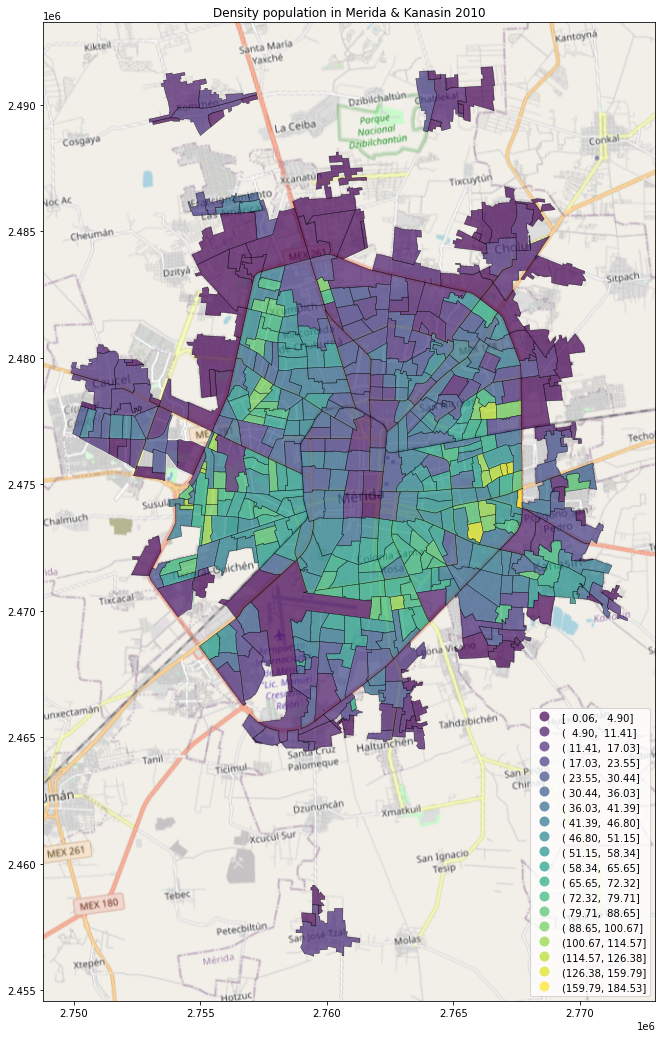

In [38]:
# Plotting 
f, ax = plt.subplots(1, figsize=(18, 18))


merida.plot(ax=ax, column = 'pop_den', cmap = 'viridis', scheme='fisherjenks', legend = True, k=19,
        legend_kwds={"loc": 4},
            edgecolor='black',
        linewidth=0.5, 
        alpha=0.7)
contextily.add_basemap(ax, 
                        crs=merida.crs,
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_title('Density population in Merida & Kanasin 2010')

plt.savefig('population_merida&Kanasin_density2010.jpg')